<a href="https://colab.research.google.com/github/jonnie763/DATA-Science-601/blob/main/Week_8_assignment_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment Content

Each XLS or XLSX file contains a dataframe. ​

Load each XLS or XLSX file in your Jupyter notebook. ​

For each dataframe, address missing values by taking the following steps:​

1.Count the number of missing values in the dataframe; count the number of missing values per column​

2.Plot the distribution of data points using a histogram​  
Create a lag plot (a lag plot shows t versus t+1)​

3.Based on the lag plot, state in a markdown cell whether the order of this data matters. ​

Do one of the following (not both):​

1.If the order of the data matters, then interpolate the missing values​

2.If the order of the data does not matter, fill in the missing data by sampling from the distribution​

3.Create a scatter plot using the columns in dataframe; no Nan entries should be present​

Final Step: Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.​

Notes: Perform interpolation or sampling programmatically using Python (not manually)​ ​ ​

In [1]:
import pandas as pd # One of the only libraries/modules we need 
import numpy as np  # I meant need this later for filling in values 

In [2]:
df= pd.read_excel("imputation_homework_04.xls") # First Excel Sheet 
df                                              # Print dataframe 

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [3]:
df.info(verbose=True) # There are fifty null values in one column (500-450)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   time        500 non-null    float64
 2   value       450 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


## 1. There are fifty null values in one column (value). The rest have no null values (450 non-null versus 500 non null). 500 minus 450 equals fifty null values. 

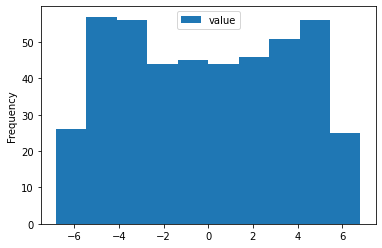

In [4]:
df.plot(kind='hist',x='time',y='value') # Required Histogram visual, symmetric graph 

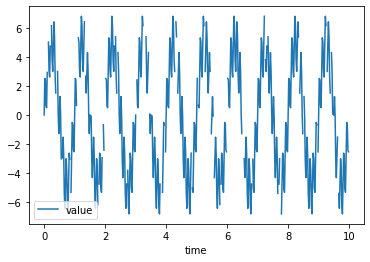

In [5]:
df.plot(kind='line',x='time',y='value') # I liked looking at the line graph too, as I can see the holes in the data better 

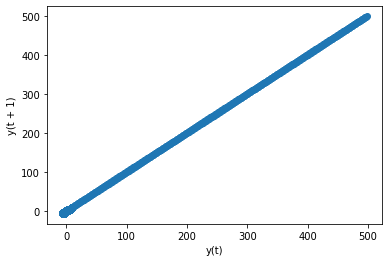

In [6]:
pd.plotting.lag_plot(df, lag=1) # A linear lag plot graph means the order does not matter 

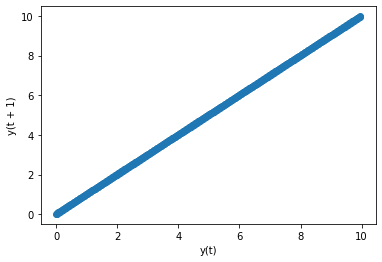

In [7]:
pd.plotting.lag_plot(df['time'], lag = 1) #https://towardsdatascience.com/4-pandas-plotting-function-you-should-know-5a788d848963
                                        # A linear lag plot graph means the order does not matter 

##2. Based on the lag plot the order of the data does not matter. 

##3. Sample the missing values (Order does not matter) 

In [8]:
df_fill_1=df.fillna(method ='bfill') # https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
df_fill_1.info()                     # No null data (it has been filled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   time        500 non-null    float64
 2   value       500 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


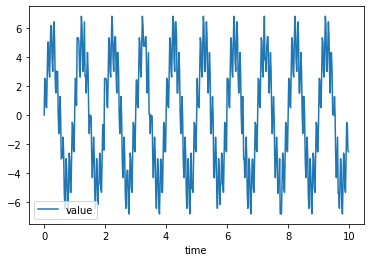

In [9]:
df_fill_1.plot(kind='line',x='time',y='value') # I like looking at the line graph here to see the missing value filled 

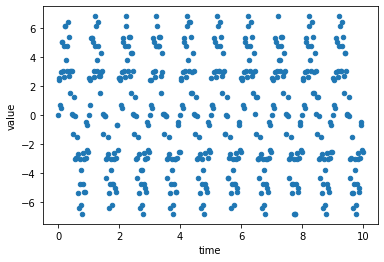

In [10]:
df_fill_1.plot(kind='scatter',x='time',y='value') # Scatter plot with filled in data as required 

##Part Two: Second Excel Sheet



In [11]:
df_2= pd.read_excel("imputation_homework_29.xlsx") # Second data frame 
df_2

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [12]:
df_2.info() # 9 null values (108-99=9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  108 non-null    int64  
 1   x           99 non-null     float64
 2   y           108 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


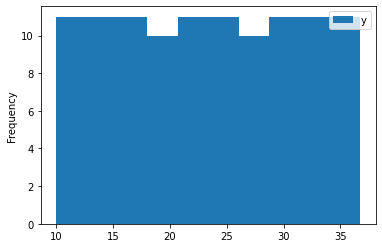

In [13]:
df_2.plot(kind='hist',x='x',y='y') # Required histogram, uniform distribution this time 

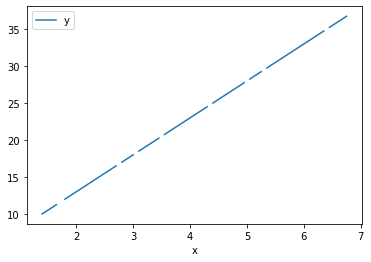

In [14]:
df_2.plot(kind='line',x='x',y='y') # I liked looking at the line graph too, as I can see the holes in the data better

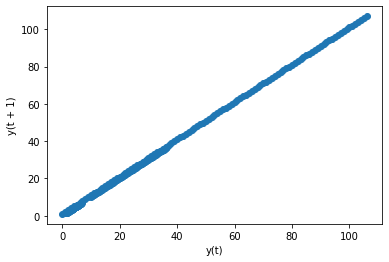

In [15]:
pd.plotting.lag_plot(df_2, lag=1) # According to the graphs below, the order does not matter 

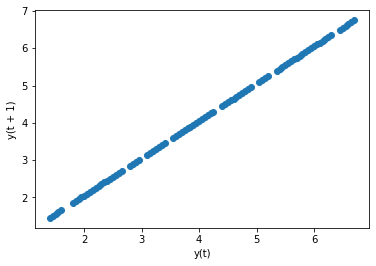

In [16]:
pd.plotting.lag_plot(df_2['x'], lag = 1)

##Based on the lag plot the order of the data does not matter. 

In [17]:
df_fill_2=df_2.fillna(method ='bfill') # https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
df_fill_2.info()                       # Fill in the missing values as you can see there are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  108 non-null    int64  
 1   x           108 non-null    float64
 2   y           108 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


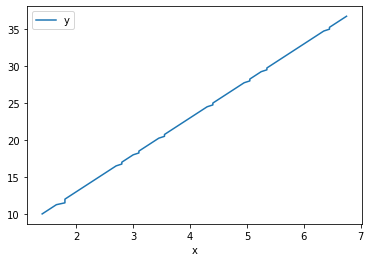

In [18]:
df_fill_2.plot(kind='line',x='x',y='y') # I like looking at the line graph here to see the missing value filled 

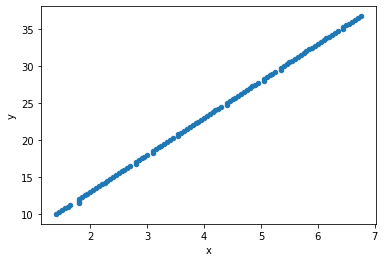

In [19]:
df_fill_2.plot(kind='scatter',x='x',y='y') # Scatter plot with filled in data as required 

##Part Three: Third Excel Sheet

In [20]:
df_3= pd.read_excel("imputation_homework_91.xlsx") # Last dataframe, this one produces "different" results then the ones above 
df_3

,Unnamed: 0,date,value
0,0,2015-11-03,30.001248
1,1,2015-11-04,4.655104
2,2,2015-11-05,15.621201
3,3,2015-11-06,22.982759
4,4,2015-11-07,39.994644
...,...,...,...
847,847,2018-02-27,NaN
848,848,2018-02-28,14.196152
849,849,2018-03-01,21.058815
850,850,2018-03-02,21.038230


In [21]:
df_3.info() # 84 null values this time (852-768=84)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  852 non-null    int64         
 1   date        852 non-null    datetime64[ns]
 2   value       768 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 20.1 KB


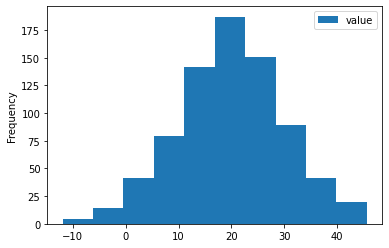

In [22]:
df_3.plot(kind='hist',x='date',y='value') # Looks skewed to the left here 

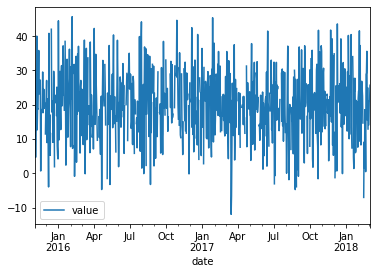

In [23]:
df_3.plot(kind='line',x='date',y='value') # As stated before I like looking at the line graphs here 

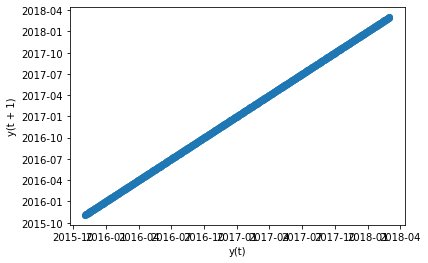

In [24]:
pd.plotting.lag_plot(df_3['date'], lag=1) # This one is linear but the one below is not 

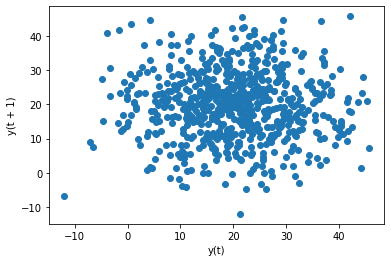

In [25]:
pd.plotting.lag_plot(df_3['value'], lag = 1) # I think because it is non-linear, interpolate is used 

##Based on the lag plot the order of the data does matter. 

In [26]:
df_4=df_3.interpolate() # Interpolate to fill in the data 
df_4                    # Print dataframe 

,Unnamed: 0,date,value
0,0,2015-11-03,30.001248
1,1,2015-11-04,4.655104
2,2,2015-11-05,15.621201
3,3,2015-11-06,22.982759
4,4,2015-11-07,39.994644
...,...,...,...
847,847,2018-02-27,13.552134
848,848,2018-02-28,14.196152
849,849,2018-03-01,21.058815
850,850,2018-03-02,21.038230


In [27]:
df_4.info() # Now there are no more null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  852 non-null    int64         
 1   date        852 non-null    datetime64[ns]
 2   value       852 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 20.1 KB


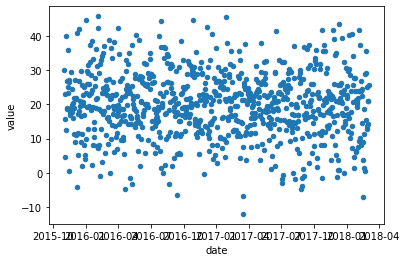

In [28]:
df_4.plot(kind='scatter',x='date',y='value') # Plot with filled in data 